In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

1. Оценить En(ξ) с помощью МСМС для графа 8х8

In [40]:
n = 8

def proposal(current):
    q = (np.random.randint(n ** 2)) % (n ** 2)
    i = q // n 
    j = q % n  

    if (current[q] == 1) :
        current[q] = 0
        return current
    
    x = 0
    if (i == 0) :
        if (j == 0):
            if ((current[1] == 0) and (current[n] == 0)):
                x = 1
        elif (j == n - 1) :
            if ((current[n - 2] == 0) and (current[(i + 1) * n + j] == 0)):
                x = 1
        elif ((j != 0) & (j != n-1)):
            if ((current[(j - 1)] == 0) and (current[j+ 1] == 0) and (current[(i + 1) * n + j] == 0)):
                x = 1
    
    elif (i == n - 1):
        if (j == 0):
            if ((current[(i - 1) * n] == 0) and (current[i * n + 1] == 0)):
                x = 1
        elif (j == n - 1):
            if ((current[i * n + j - 1] == 0) and (current[(i - 1) * n + j] == 0)):
                x = 1
        elif ((j != 0) & (j != n - 1)):
            if ((current[i * n + j - 1] == 0) and (current[i * n + j + 1] == 0) and (current[(i - 1) * n + j] == 0)):
                x = 1
    
    elif ((i != 0) & (i != n - 1)):
        if (j == 0):
            if ((current[(i - 1) * n] == 0) and (current[i * n + 1] == 0) and (current[(i + 1) * n] == 0)):
                x = 1
        elif (j == n - 1):
            if ((current[i * n + j - 1] == 0) and (current[(i - 1) * n + j] == 0) and (current[(i + 1) * n + j] == 0)) :
                x = 1
        elif ((j != 0) & (j != (n - 1))):
            if ((current[i * n + j - 1] == 0) and (current[i * n + j + 1] == 0)and (current[(i - 1) * n + j] == 0) and (current[(i + 1) * n + j] == 0)):
                x = 1    

    if (x == 1) : 
        current[q] = 1
        
    return current

In [54]:
def value(current):
    return np.count_nonzero(current)

In [55]:
def graph(start, value, proposal, niter, nburn):
    current = start
    post = np.zeros(niter * n * n).reshape(niter, n * n)
    post[0] = current
    
    for i in range(niter):
        proposed = proposal(current)
        if (value(current) == 0):
            p = 1
        else:
            p = value(proposed) / value(current)
        if np.random.rand() < p:
            current = proposed    
        post[i] = current
        
    return post[nburn:]

In [67]:
n = 8
start = np.zeros(n ** 2)
post = graph(start, value, proposal, 64000, 0)
sm = np.sum(post, axis = 1)

expectation = np.sum(sm) / 64000
print('En(ξ)  =  ' , expectation)

En(ξ)  =   15.321796875


2. Обосновать численно и графически стационарность

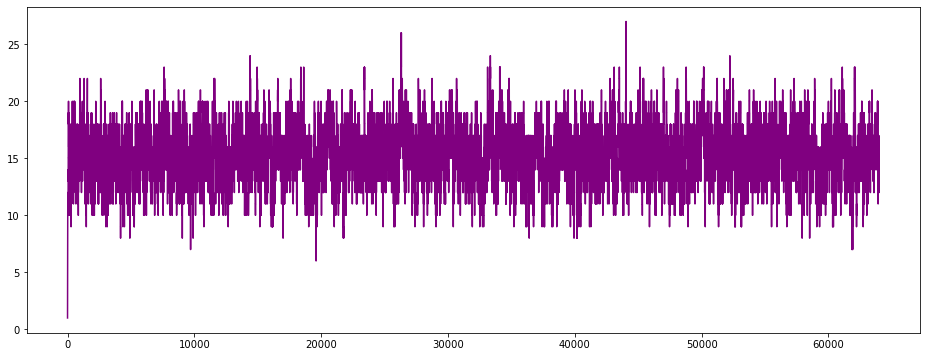

In [79]:
n = 8
start = np.zeros(n ** 2)
post = graph(start, value, proposal, 64000, 0)
sm = np.sum(post, axis = 1)

plt.figure(figsize = (16, 6))
plt.plot(sm, color = 'purple')

plt.show()

In [80]:
def g_test(x, start=0.1, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)
#Т-тест из интернета

In [81]:
print(g_test(sm))

Ttest_indResult(statistic=-14.123764351141201, pvalue=7.971830342233182e-45)


Видим результаты Т-теста, p-значение мало, что и доказывает стационарность

3. Построить график распределеиня  n(ξ)

Еще раз построим с начальной нулевой матрицей, а также посмотрим на ситуацию, когда начальная матрица состоит из едениц:

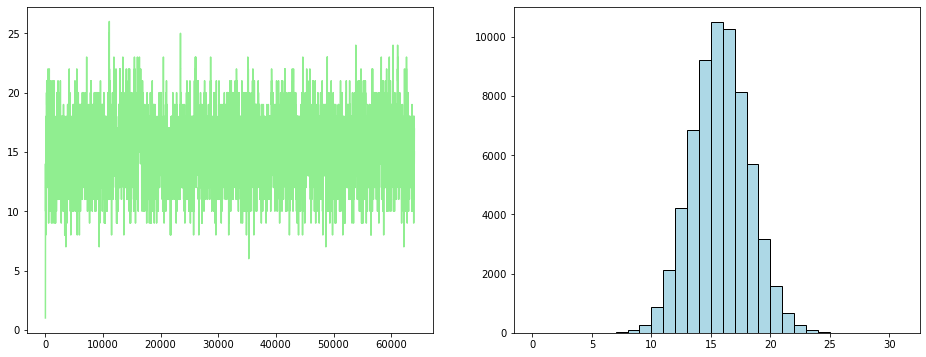

In [86]:
n = 8
start = np.zeros(n ** 2)
post = graph(start, value, proposal, 64000, 0)
sm = np.sum(post, axis = 1)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (16, 6))
ax1.plot(sm, color = 'lightgreen')
ax2.hist(sm, np.arange(32), edgecolor = 'black', color = 'lightblue')

plt.show()

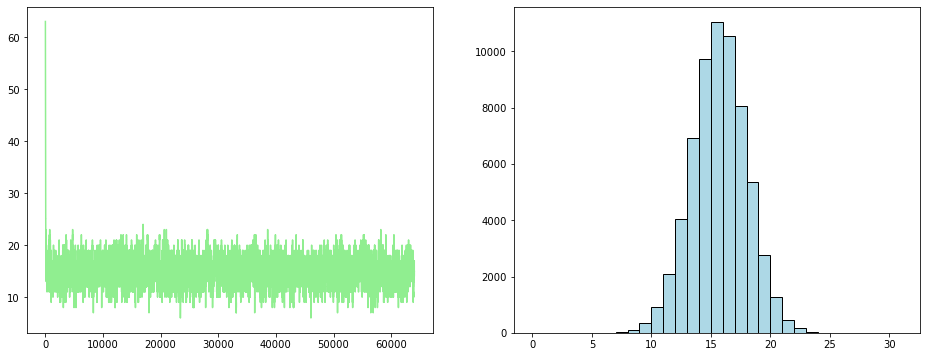

In [89]:
n = 8
start = np.ones(n ** 2)
post = graph(start, value, proposal, 64000, 0)
sm = np.sum(post, axis = 1)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (16, 6))
ax1.plot(sm, color = 'lightgreen')
ax2.hist(sm, np.arange(32), edgecolor = 'black', color = 'lightblue')

plt.show()

In [91]:
print(g_test(sm))

Ttest_indResult(statistic=5.597116850207798, pvalue=2.2567291853168635e-08)


Получаем вполне прогнозируемый вывод, что стационарное распределение не зависит от того, с какого графа мы стартуем

4. Изобразить раскраску для одного из случайных графов, взятых из стационарного распределения

In [95]:
n = 8
start = np.ones(n ** 2)
post = graph(start, value, proposal, 64000, 0)

In [96]:
np.size(post)

4096000

In [97]:
post[1189].reshape(8, 8)

array([[0., 0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0.]])

In [101]:
sm = np.sum(post[1189])
sm

15.0

In [102]:
nz = np.argwhere(post[1189])
x = nz % n
y = nz // n

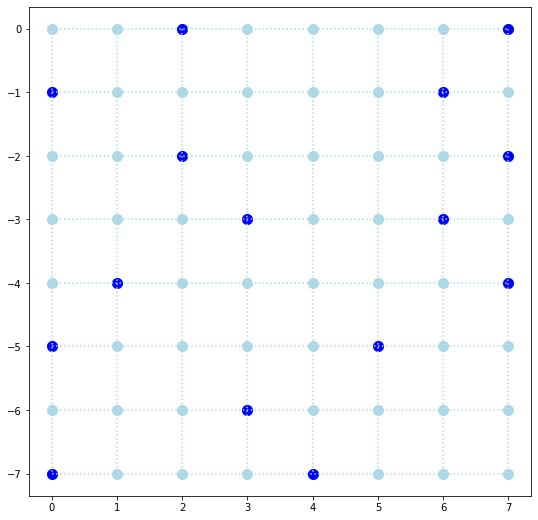

In [108]:
plt.figure(figsize = (9, 9))

for i in range(n):
    plt.scatter(np.arange(n), -i * np.ones(n), color = 'lightblue', s = 100)

for i in range(n):
    plt.plot(i * np.ones(n), -np.arange(n), color = 'lightblue', linestyle = 'dotted')
    plt.plot(np.arange(n), -i * np.ones(n), color = 'lightblue', linestyle = 'dotted')
    
plt.scatter(x, -y, color = 'blue', s = 100)

plt.show()